In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

# Get data files


In [ ]:
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

#Caminho dos Dataset

In [3]:
train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

#Preparando Dataset e Separando Labels

In [4]:
train_file = pd.read_table(train_file_path, header=None)
test_file = pd.read_table(test_file_path, header=None)

#Separando target das features

In [5]:
X_train = train_file[1]
Y_train = np.array(train_file[0].to_list())

#Separando os testes

In [6]:
X_test = test_file[1]
Y_test = np.array(test_file[0].to_list())

#Colocando variáveis de configuração

In [7]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

#Pré-processando os dados

In [8]:
t = Tokenizer(vocab_size,oov_token=oov_tok)
t.fit_on_texts(X_train)

word_index = t.word_index

X_train_t = t.texts_to_sequences(X_train)
training_padded = pad_sequences(X_train_t, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_t = t.texts_to_sequences(X_test)
testing_padded = pad_sequences(X_test_t, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_y = le.fit_transform(Y_train)
test_y = le.transform(Y_test)

training_padded = np.array(training_padded)
train_label = np.array(train_y)
testing_padded = np.array(testing_padded)
test_label = np.array(test_y)

#Criando o modelo e treinando

In [20]:
model = keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

num_epochs = 5
history = model.fit(training_padded, train_label, epochs=num_epochs, validation_data=(testing_padded, test_label))

Epoch 1/5
131/131 [==============================] - 2s 9ms/step - loss: 0.2663 - accuracy: 0.8918 - val_loss: 0.0993 - val_accuracy: 0.9763
Epoch 2/5
131/131 [==============================] - 1s 7ms/step - loss: 0.0495 - accuracy: 0.9852 - val_loss: 0.0450 - val_accuracy: 0.9885
Epoch 3/5
131/131 [==============================] - 1s 8ms/step - loss: 0.0160 - accuracy: 0.9955 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 4/5
131/131 [==============================] - 1s 7ms/step - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0396 - val_accuracy: 0.9878
Epoch 5/5
131/131 [==============================] - 1s 7ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.0402 - val_accuracy: 0.9878


#Mostrando o treino gráficamente

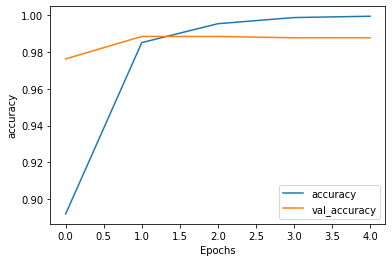

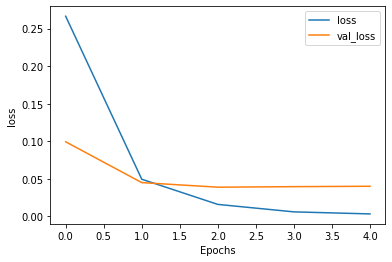

In [21]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#Criando função de teste

In [22]:
sentence = ["sale today! to stop texts call 98912460324"]

def previsao(sentence):
  sequences = t.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return (float(model.predict(padded)), 'ham' if model.predict(padded) < 0.5 else 'spam' )

previsao(sentence)

1/1 [==============================] - 0s 30ms/step


(0.5739505290985107, 'spam')

#Função para o teste

In [23]:
def predict_message(sentence):
  sequences = t.texts_to_sequences([sentence])
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  return (float(model.predict(padded)), 'ham' if model.predict(padded) < 0.5 else 'spam' )

#Teste do desafio

In [24]:
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):   
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

1/1 [==============================] - 0s 24ms/step
You passed the challenge. Great job!
